In [2]:
import kaggle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
df1 = pd.read_csv('events1.csv')
df1.head(20)

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29
5,5808,4267,US,mobile,add_to_cart,951,2020-11-01 03:06:29
6,5808,4267,US,mobile,add_to_cart,950,2020-11-01 03:06:29
7,5808,4267,US,mobile,add_to_cart,1068,2020-11-01 03:06:29
8,5808,4267,US,mobile,add_to_cart,862,2020-11-01 03:06:29
9,5808,4267,US,mobile,add_to_cart,1119,2020-11-01 03:06:29




# Data Cleaning And & Manipulation



In [4]:
df2 = pd.read_csv('items.csv')

#rename columns
df2.rename(columns={"id":"item_id",'name':'item_name'}, inplace=True)
df2.head(20)

,item_id,item_name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11
5,5,Google SF Campus Zip Hoodie,Google,LG,Clearance,32
6,6,Google Chicago Campus Unisex Tee,Google,MD,Campus Collection,14
7,7,Google SF Campus Unisex Tee,Google,SM,Clearance,14
8,8,Super G Unisex Joggers,Google,LG,Shop by Brand,30
9,9,Mommy Works at Google Book,Google,Single Option Only,Small Goods,16


In [5]:
#merge events1.csv and items.csv
df3 = pd.merge(df1,df2, on="item_id", how="inner")

#drop unrelated/blank columns
df3.drop('ga_session_id', axis=1, inplace=True)
df3.head(20)

,user_id,country,device,type,item_id,date,item_name,brand,variant,category,price_in_usd
0,2133,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,Single Option Only,New,28
3,5789,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Single Option Only,Fun,2
4,5808,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25
5,5808,US,mobile,add_to_cart,951,2020-11-01 03:06:29,YouTube Icon Tee Grey,YouTube,NaN,Apparel,22
6,5808,US,mobile,add_to_cart,950,2020-11-01 03:06:29,Google Navy Speckled Tee,Google,NaN,Apparel,30
7,5808,US,mobile,add_to_cart,1068,2020-11-01 03:06:29,Google Eco Tee Black,Google,NaN,Apparel,22
8,5808,US,mobile,add_to_cart,862,2020-11-01 03:06:29,Google Land & Sea French Terry Sweatshirt,Google,NaN,Shop by Brand,55
9,5808,US,mobile,add_to_cart,1119,2020-11-01 03:06:29,Google Crew Socks,Google,NaN,Apparel,16


In [6]:
df3.shape

(758884, 11)

In [7]:
df3.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       758884 non-null  int64 
 1   country       754329 non-null  object
 2   device        758884 non-null  object
 3   type          758884 non-null  object
 4   item_id       758884 non-null  int64 
 5   date          758884 non-null  object
 6   item_name     758884 non-null  object
 7   brand         758884 non-null  object
 8   variant       122624 non-null  object
 9   category      758884 non-null  object
 10  price_in_usd  758884 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 63.7+ MB


In [8]:
#check for null values
pd.isnull(df3).sum()

user_id              0
country           4555
device               0
type                 0
item_id              0
date                 0
item_name            0
brand                0
variant         636260
category             0
price_in_usd         0
dtype: int64

In [9]:
# drop null values
df3.dropna(inplace=True)

In [10]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df3.describe()

,user_id,item_id,price_in_usd
count,121855.000000,121855.000000,121855.000000
mean,21946.096877,325.710254,20.606680
std,38444.472224,329.940360,19.450365
min,1.000000,0.000000,1.000000
25%,7757.000000,79.000000,7.000000
50%,16009.000000,208.000000,14.000000
75%,24944.000000,433.000000,26.000000
max,270145.000000,1380.000000,120.000000


In [11]:
print(df3.columns)

Index(['user_id', 'country', 'device', 'type', 'item_id', 'date', 'item_name',
       'brand', 'variant', 'category', 'price_in_usd'],
      dtype='object')


# Exploratory Data Analysis



### Country



In [12]:
# plotting a bar chart for country vs price_in_usd

sales_by_country = df3.groupby(['country'],as_index=False)['price_in_usd'].sum().sort_values(by='price_in_usd', ascending=False).head(10)
print(sales_by_country)

    country  price_in_usd
102      US       1108907
46       IN        237894
16       CA        226132
34       GB         72473
31       ES         52132
33       FR         46607
100      TW         43767
19       CN         42519
52       JP         33342
92       SG         33166


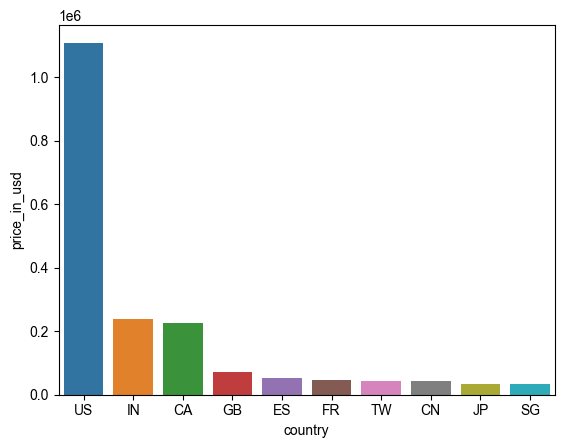

In [13]:
sns.barplot(x = 'country',y= 'price_in_usd',hue='country', data = sales_by_country)
sns.set(rc={'figure.figsize':(10,5)})

*From above graphs we can see that most of the buyers are from USA, INDIA, CANADA and United Kingdom including all type*



### Purchase Type



<Axes: xlabel='country', ylabel='price_in_usd'>

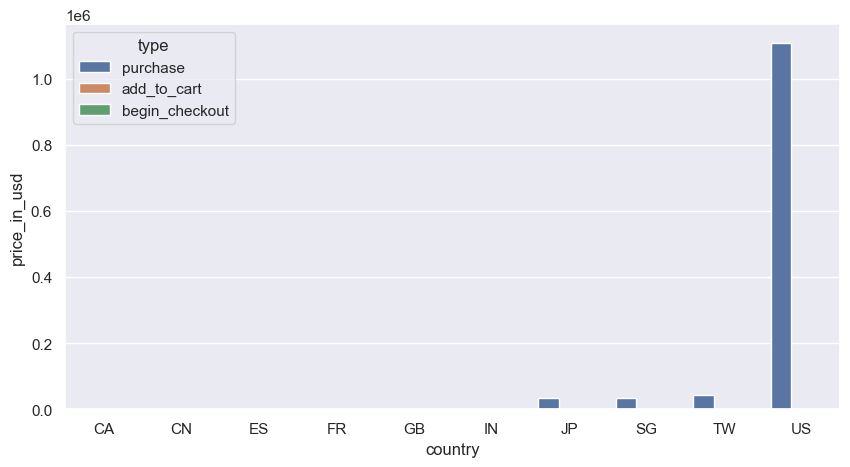

In [14]:
# sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x = 'country',y= 'price_in_usd', hue=df3['type'],data = sales_by_country)

*From above graphs we can see that actual purchases are from USA. USA has most purschases in all*



### Devices



<Axes: xlabel='country', ylabel='price_in_usd'>

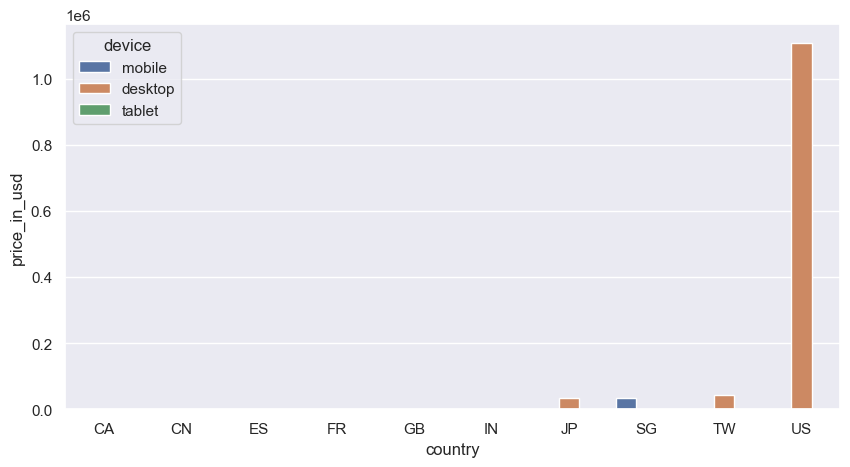

In [15]:
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(x = 'country',y='price_in_usd', hue=df3['device'],data = sales_by_country)

*From above graphs we can see that most purchases made using DESKTOP from USA*



### Brand



In [16]:
# plotting a bar chart for Brand vs price_in_usd

sales_by_brand = df3.groupby(['brand'],as_index=False)['price_in_usd'].sum().sort_values(by='price_in_usd', ascending=False).head(10)
print(sales_by_brand)

            brand  price_in_usd
2          Google       2174241
4         YouTube        137388
1         Android        130210
3    Google Cloud         50104
0  #IamRemarkable         19084


<Axes: xlabel='brand', ylabel='price_in_usd'>

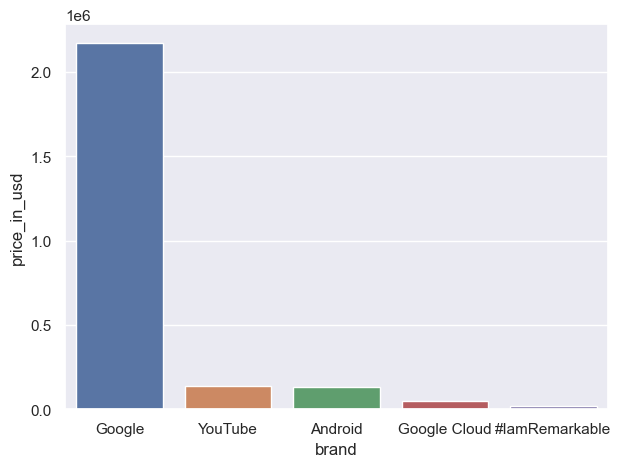

In [17]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x = 'brand',y= 'price_in_usd', hue='brand',data = sales_by_brand)

*From above graphs we can see that most purchased brands are Google, Youtube & Android form USA, CANADA & INDIA*



### Category



In [18]:
# plotting a bar chart for category vs price_in_usd

sales_by_category = df3.groupby(['category'],as_index=False)['price_in_usd'].sum().sort_values(by='price_in_usd', ascending=False).head(10)
print(sales_by_category)

               category  price_in_usd
1               Apparel       1370084
2                  Bags        172011
16        Shop by Brand        170449
13                  New        153867
4     Campus Collection        114442
0           Accessories         97985
19  Uncategorized Items         84983
12            Lifestyle         84933
5             Clearance         76274
6             Drinkware         75385


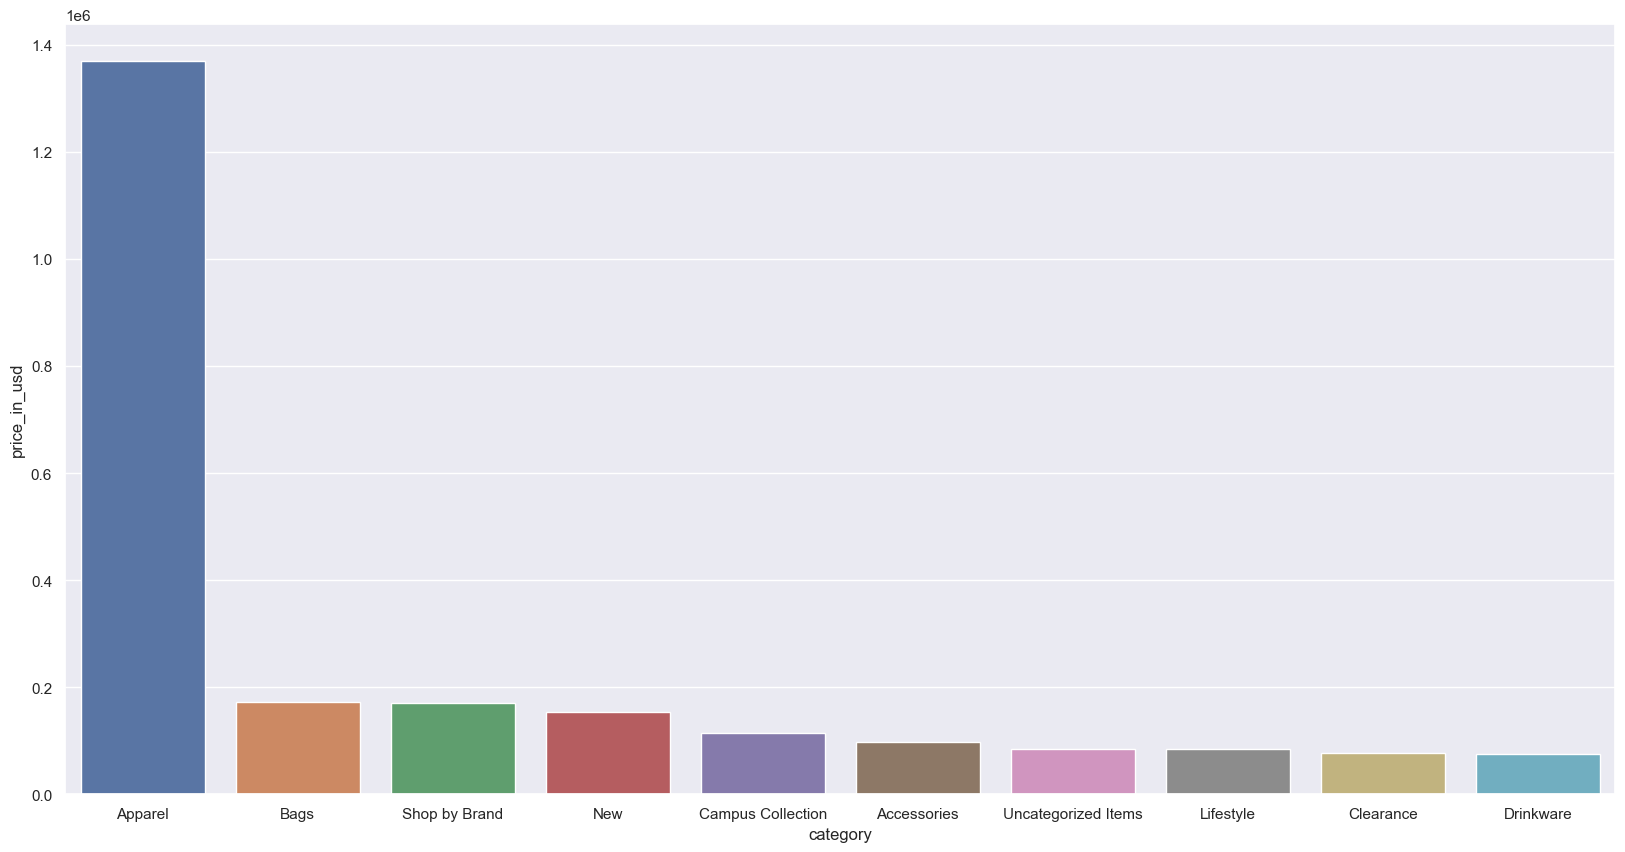

In [23]:
sns.barplot(x = 'category',y= 'price_in_usd', hue='category',data = sales_by_category)
sns.set(rc={'figure.figsize':(15,10)})

*From above graphs we can see that most purchased items comes under apparel category*

### Variant

In [20]:
# plotting a bar chart for variant vs price_in_usd

sales_by_variant = df3.groupby(['variant'],as_index=False)['price_in_usd'].sum().sort_values(by='variant', ascending=False).head(10)
print(sales_by_variant)

                 variant  price_in_usd
43                    XS         50549
42                    XL         36662
41    Single Option Only        933214
40                    SM         74029
39  No options available           190
38               NEWBORN           475
37                    MD         92717
36                    LG        280678
35           Choose Size         15764
34                  BLUE           236


In [ ]:
sns.barplot(x = 'variant',y= 'price_in_usd', hue='variant',data = sales_by_variant)
sns.set(rc={'figure.figsize':(10,10)})

*From above graphs we can see that most purchased items are single option only, LG, MD under apparel category*

***

# Conclusion

Most of the buyers from USA, INDIA & CANADA.

**Most Purchased:**
* USA has most in all made using DESKTOP.
* Brands are Google, Youtube & Android.
* Items comes under apparel category.
* Variants are single option only, LG, MD.

complete project on GitHub: https://github.com/NoorMohdDev/Google-Merchandise-Sales-Data-Analysis

Thank You!